# Fahad Aloraini
# 201725050 

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import csv
pd.set_option("max_columns", None)
#opining the data
df = pd.read_csv('Dataset-vf.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,2709,59.0,11,120,43,150,228,217,120,2114,0.66,269,FC11,CA49,R1,Melon
1,2802,54.0,7,0,0,693,224,225,136,162,0.35,195,FC11,CA50,NaN,Melon
2,2325,28.0,12,0,0,1260,215,213,133,162,0.89,750,FC14,CA26,NaN,Carrot
3,2837,112.0,8,272,16,3649,235,231,128,6221,0.27,-155,FC11,CA32,NaN,Orange
4,2509,59.0,7,134,10,900,226,226,134,5184,0.93,88,FC11,CA38,NaN,Melon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6369,3101,67.0,6,170,1,824,227,228,135,1657,0.50,437,FC11,CA43,NaN,Apple
6370,3050,139.0,13,30,-3,3127,240,235,123,5770,0.74,53,FC11,CA40,NaN,Apple
6371,2080,106.0,24,30,12,582,252,202,64,108,0.88,-79,FC14,CA23,NaN,Carrot
6372,3011,108.0,10,212,36,2912,237,229,122,6632,0.67,-299,FC11,CA49,NaN,Apple


# Dataset analysis 

In [3]:
df.dtypes

X1       int64
X2     float64
X3       int64
X4       int64
X5       int64
X6       int64
X7       int64
X8       int64
X9       int64
X10      int64
X11    float64
X12      int64
X13     object
X14     object
X15     object
Y       object
dtype: object

### as you can see most of the types are numerical but X13,X14,X15 are not 
### so we will have to do somting about this later 

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>],
       [<AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>],
       [<AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>],
       [<AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>]], dtype=object)

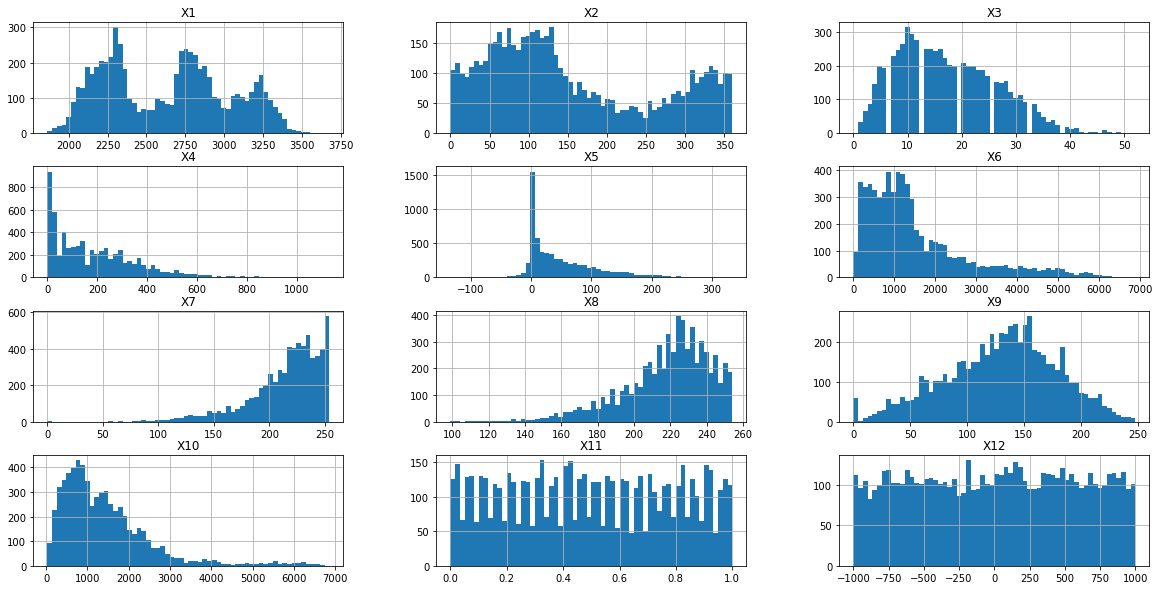

In [5]:
df.hist(bins=60,figsize=(20,10))

### most of the data has an acceptable distribution  (not alot of outliers)

### now lets remove the y from the datafram 

In [6]:
#getting the values of Y and removing it from the df
dfY = df.loc[:,"Y"]
print(dfY.value_counts())
del df['Y']


Carrot    1620
Melon     1571
Apple     1275
Berry     1250
Peach      308
Mango      250
Orange     100
Name: Y, dtype: int64


## problem with null data 

In [7]:
#null check
print(df.isna().sum())


#remove column X15, most of the values are null 
del df['X15']

#fill X2 with the mean of the column 
df = df.fillna(value=df['X2'].mean())



X1        0
X2      627
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15    5743
dtype: int64


### as you can see the only null values are in X2 and X15

#### X2: some of the data has X2 as null, this can be solved by diffrent approachs, since the data is not orderd (one row does not depend of the next or previous row) this meant that we could not use any of them, so it seems that the best approach is to use the mean

#### X15: since the majority of the data has X15 = null removing it seem to be the best approach 

In [8]:
print(df.isna().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
dtype: int64


## String values to numerical values 

In [9]:
dfYcopy = dfY
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
LEncoder = LabelEncoder()
dfY = LEncoder.fit_transform(dfY)
Y = dfY
#df.iloc[:, 13:14] = LEncoder.fit_transform(df.iloc[:, 13:14] ) #this one can be used to convert X14 to numerical numbers 
print(Y)


[4 4 2 ... 2 0 3]


### here we changed the values of Y from Strings to numerical 

In [10]:
#OneHot Encode X13
df['X13'].unique()
ohe = OneHotEncoder()
oneHotArray = ohe.fit_transform(df[['X13']]).toarray()
oneHotLabels = ohe.categories_
oneHotLabels = np.array(oneHotLabels).ravel()
OneHotX13 = pd.DataFrame(oneHotArray,columns = oneHotLabels)
df = pd.concat([df,OneHotX13],axis=1)

#OneHot Encode X14
oneHotArray = ohe.fit_transform(df[['X14']]).toarray()
oneHotLabels = ohe.categories_
oneHotLabels = np.array(oneHotLabels).ravel()
OneHotX14 = pd.DataFrame(oneHotArray,columns = oneHotLabels)
df = pd.concat([df,OneHotX14],axis=1)

del df['X13']
del df['X14']

### here we changed categorical data to one hot encoded data

In [11]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,FC11,FC12,FC13,FC14,CA21,CA22,CA23,CA24,CA25,CA26,CA30,CA31,CA32,CA33,CA34,CA36,CA37,CA38,CA39,CA40,CA41,CA42,CA43,CA44,CA46,CA48,CA49,CA50,CA51,CA52,CA53,CA54,CA55,CA58,CA59,CA60
0,2709,59.0,11,120,43,150,228,217,120,2114,0.66,269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2802,54.0,7,0,0,693,224,225,136,162,0.35,195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2325,28.0,12,0,0,1260,215,213,133,162,0.89,750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2837,112.0,8,272,16,3649,235,231,128,6221,0.27,-155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2509,59.0,7,134,10,900,226,226,134,5184,0.93,88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6369,3101,67.0,6,170,1,824,227,228,135,1657,0.50,437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6370,3050,139.0,13,30,-3,3127,240,235,123,5770,0.74,53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6371,2080,106.0,24,30,12,582,252,202,64,108,0.88,-79,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6372,3011,108.0,10,212,36,2912,237,229,122,6632,0.67,-299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## problem with unbalanced data 

In [12]:
dfYcopy = dfYcopy.to_frame()

<AxesSubplot:>

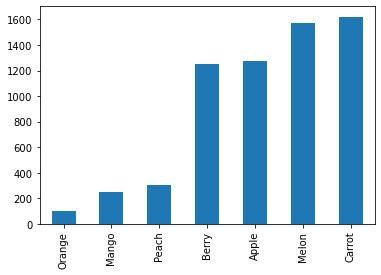

In [13]:
dfYcopy.Y.value_counts().sort_values().plot(kind = 'bar')

### as we can see the data is not balanced so we need to balance it 

##### using SMOTEENN

In [14]:
from collections import Counter
from imblearn.combine import SMOTEENN 

print('Original dataset shape %s' % Counter(Y))
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(df, Y)
print('Resampled dataset shape %s' % Counter(y_res))

df = X_res
Y = y_res
print(df.shape)

Original dataset shape Counter({2: 1620, 4: 1571, 0: 1275, 1: 1250, 6: 308, 3: 250, 5: 100})
Resampled dataset shape Counter({6: 1603, 5: 1601, 3: 1587, 4: 1241, 2: 1200, 0: 1079, 1: 872})
(9183, 48)


##### using RandomUnderSampler

In [15]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 

#print('Original dataset shape %s' % Counter(Y))
#rus = RandomUnderSampler(random_state=42)
#X_res, y_res = rus.fit_resample(df, Y)
#print('Resampled dataset shape %s' % Counter(y_res))

#df = X_res
#Y = y_res
#print(df.shape)

##### using SMOTE

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

#print('Original dataset shape %s' % Counter(Y))
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(df, Y)
#print('Resampled dataset shape %s' % Counter(y_res))

#df = X_res
#Y = y_res
#print(df.shape)

### since the output (Y) of the data was unbalanced  we have to balance it using various methods and pick the best method

## problem with Feature transformation/engineering

#### first we divide the data into 70 15 15 

In [17]:
#70% 15% 15%
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(df, Y, test_size=0.30, random_state=42)
testx, valx, testy, valy = train_test_split(testx, testy, test_size=0.50, random_state=42)


#### since we are not familiar with the meaning of the data
#### the only thing that seem to need a change is the scaling 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#MinMax
#min_max=MinMaxScaler()
#min_max.fit(trainx)
#trainx = min_max.transform(trainx)
#testx = min_max.transform(testx)
#valx = min_max.transform(valx)

#Standard 
scaler = StandardScaler()
scaler.fit(trainx)
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)
valx = scaler.transform(valx)

## KNN

### lets find the best parameters for KNN (K,p) using the validation set

In [19]:
import time
from sklearn.neighbors import KNeighborsClassifier
### START CODE HERE ###

best_preformance = 0.0
best_k = 0
L = 0
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute',p=1)
    neigh.fit(trainx, trainy)
    current_score = neigh.score(valx,valy)
    if current_score > best_preformance:
        best_preformance = current_score
        best_k = i
        L = 1
    print("for K: ",i," the score is: ",neigh.score(valx,valy))
    
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute',p=2)
    neigh.fit(trainx, trainy)
    current_score = neigh.score(valx,valy)
    if current_score > best_preformance:
        best_preformance = current_score
        best_k = i
        L = 2
    print("for K: ",i," the score is: ",neigh.score(valx,valy))
    
print("the best K: ",best_k," and the score: ",best_preformance," p = ", L)

for K:  1  the score is:  0.9528301886792453
for K:  2  the score is:  0.95355587808418
for K:  3  the score is:  0.9433962264150944
for K:  4  the score is:  0.9368650217706821
for K:  5  the score is:  0.93033381712627
for K:  6  the score is:  0.9325108853410741
for K:  7  the score is:  0.9259796806966618
for K:  8  the score is:  0.9310595065312046
for K:  9  the score is:  0.9245283018867925
for K:  10  the score is:  0.9245283018867925
for K:  11  the score is:  0.9165457184325109
for K:  12  the score is:  0.9172714078374455
for K:  13  the score is:  0.9136429608127722
for K:  14  the score is:  0.9129172714078374
for K:  15  the score is:  0.9063860667634253
for K:  16  the score is:  0.9078374455732946
for K:  17  the score is:  0.9027576197387518
for K:  18  the score is:  0.9042089985486212
for K:  19  the score is:  0.8991291727140783
for K:  20  the score is:  0.8984034833091437
for K:  21  the score is:  0.8962264150943396
for K:  22  the score is:  0.8940493468795355
f

for K:  82  the score is:  0.806966618287373
for K:  83  the score is:  0.8055152394775036
for K:  84  the score is:  0.8047895500725689
for K:  85  the score is:  0.8033381712626996
for K:  86  the score is:  0.8040638606676342
for K:  87  the score is:  0.8018867924528302
for K:  88  the score is:  0.8018867924528302
for K:  89  the score is:  0.8011611030478955
for K:  90  the score is:  0.8011611030478955
for K:  91  the score is:  0.8004354136429608
for K:  92  the score is:  0.8004354136429608
for K:  93  the score is:  0.7997097242380261
for K:  94  the score is:  0.7989840348330914
for K:  95  the score is:  0.7997097242380261
for K:  96  the score is:  0.7989840348330914
for K:  97  the score is:  0.7982583454281568
for K:  98  the score is:  0.7997097242380261
for K:  99  the score is:  0.7989840348330914
the best K:  2  and the score:  0.95355587808418  p =  1


### lets use the parameters in the test set

In [20]:
neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute',p=L)
neigh.fit(trainx, trainy)
current_score = neigh.score(testx,testy)
print("the best K:", best_k," and the score:",  current_score," p =",  L)

the best K: 2  and the score: 0.9644153957879448  p = 1


## knn report

#### lets find the best balancing data method
1- min_max, SMOTEENN 
the best K:  1  and the score:  0.9549745824255628  p =  1

2- min_max, RandomUnderSampler 
the best K:  1  and the score:  0.7714285714285715  p =  1

3- min_max, SMOTE 
the best K:  1  and the score:  0.9176954732510288  p =  1

#### as we can see SMOTEENN is the best 

#### now lets try diffrent scaling 

1- min_max, SMOTEENN 
the best K:  1  and the score:  0.9549745824255628  p =  1

2- standard,SMOTEENN
the best K:  2  and the score:  0.9644153957879448  p =  1

#### lets try numerically encode X14

1- standard,SMOTEENN and numerically encoded X14
the best K:  1  and the score:  0.9564586357039188  p =  1

## SVM

### lets find the best parameters for SVM (degree,kernel) using the validation set

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# Instantiate the Support Vector Classifier (SVC)
best_score = 0
best_method = ""
best_paramenter = ""
best_poly = -1
for i in range(1,15):
    svc = SVC(C=1.0, random_state=1, kernel='poly',degree=i)

    # Fit the model
    svc.fit(trainx, trainy)


    # Make the predictions
    y_predict = svc.predict(valx)

    # Measure the performance
    print("using poly of degree:",i)
    print("Accuracy score %.3f" %metrics.accuracy_score(valy, y_predict))
    if metrics.accuracy_score(valy, y_predict) > best_score:
        best_score = metrics.accuracy_score(valy, y_predict)
        best_method = "the best method is when using poly with degree:" + str(i)
        best_paramenter = "poly"
        best_poly = i
        
svc = SVC(C=1.0, random_state=1, kernel='rbf')

# Fit the model
svc.fit(trainx, trainy)

# Make the predictions
y_predict = svc.predict(valx)

# Measure the performance
print("using rbf")
print("Accuracy score %.3f" %metrics.accuracy_score(valy, y_predict))
if metrics.accuracy_score(valy, y_predict) > best_score:
    best_score = metrics.accuracy_score(valy, y_predict)
    best_method = "the best method is when using rbf"
    best_paramenter = "rbf"

    
svc = SVC(C=1.0, random_state=1, kernel='linear')

# Fit the model
svc.fit(trainx, trainy)

# Make the predictions
y_predict = svc.predict(valx)

# Measure the performance
print("using linear")
print("Accuracy score %.3f" %metrics.accuracy_score(valy, y_predict))
if metrics.accuracy_score(valy, y_predict) > best_score:
    best_score = metrics.accuracy_score(valy, y_predict)
    best_method = "the best method is when using linear"
    best_paramenter = "linear"

    
svc = SVC(C=1.0, random_state=1, kernel='sigmoid')

# Fit the model
svc.fit(trainx, trainy)

# Make the predictions
y_predict = svc.predict(valx)

# Measure the performance
print("using sigmoid")
print("Accuracy score %.3f" %metrics.accuracy_score(valy, y_predict))
if metrics.accuracy_score(valy, y_predict) > best_score:
    best_score = metrics.accuracy_score(valy, y_predict)
    best_method = "the best method is when using sigmoid"
    best_paramenter = "sigmoid"

    

print(best_method)
print("with a score of:",best_score)

using poly of degree: 1
Accuracy score 0.893
using poly of degree: 2
Accuracy score 0.911
using poly of degree: 3
Accuracy score 0.911
using poly of degree: 4
Accuracy score 0.885
using poly of degree: 5
Accuracy score 0.845
using poly of degree: 6
Accuracy score 0.813
using poly of degree: 7
Accuracy score 0.779
using poly of degree: 8
Accuracy score 0.739
using poly of degree: 9
Accuracy score 0.696
using poly of degree: 10
Accuracy score 0.669
using poly of degree: 11
Accuracy score 0.631
using poly of degree: 12
Accuracy score 0.597
using poly of degree: 13
Accuracy score 0.586
using poly of degree: 14
Accuracy score 0.575
using rbf
Accuracy score 0.922
using linear
Accuracy score 0.921
using sigmoid
Accuracy score 0.774
the best method is when using rbf
with a score of: 0.9216255442670537


### lets use the parameters in the test set

In [22]:
if best_paramenter == "rbf":
    svc = SVC(C=1.0, random_state=1, kernel='rbf')
    svc.fit(trainx, trainy)
    y_predict = svc.predict(testx)
    print("using rbf")
    print("Accuracy score %.3f" %metrics.accuracy_score(testy, y_predict))
elif best_paramenter == "poly":
    svc = SVC(C=1.0, random_state=1, kernel='poly',degree=best_poly)
    svc.fit(trainx, trainy)
    y_predict = svc.predict(testx)
    print("using poly with degree:", best_poly)
    print("Accuracy score %.3f" %metrics.accuracy_score(testy, y_predict))
elif best_paramenter == "sigmoid":
    svc = SVC(C=1.0, random_state=1, kernel='sigmoid')
    svc.fit(trainx, trainy)
    y_predict = svc.predict(testx)
    print("using sigmoid with degree:", best_poly)
    print("Accuracy score %.3f" %metrics.accuracy_score(testy, y_predict))
    
elif best_paramenter == "linear":
    svc = SVC(C=1.0, random_state=1, kernel='linear')
    svc.fit(trainx, trainy)
    y_predict = svc.predict(testx)
    print("using linear with degree:", best_poly)
    print("Accuracy score %.3f" %metrics.accuracy_score(testy, y_predict))
    
else:
    print("error")



using rbf
Accuracy score 0.938


## SVM report

#### lets find the best balancing data method


1- min_max, SMOTEENN 
using poly with degree: 11 and the score:  0.966 

2- min_max, RandomUnderSampler 
using linear and the score:  0.724

3- min_max, SMOTE 
using poly with degree: 10 and the score:  0.930

#### as we can see SMOTEENN is the best 

#### now lets try diffrent scaling 

1- min_max, SMOTEENN 
using poly with degree: 11 and the score:  0.966 

2- standard,SMOTEENN, x14 HotEncoded:
using rbf and the score:  0.938

#### lets try numerically encode X14

1- standard,SMOTEENN and numerically encoded X14
using rbf and the score:  0.936


## logistic regression

### lets find the best parameters for logistic regression (solver, penalty, C) using the validation set

note: this will take alot of time to run so i found the best parameter once and the left the other choices as comments 

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

poly = PolynomialFeatures(2, include_bias=False) 

X_train_poly = poly.fit_transform(trainx) 
X_val_poly = poly.fit_transform(valx)  
 # standard-scale the generated poly features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

solver = ["newton-cg"]#["newton-cg", "lbfgs", "sag", "saga"]
penalty = ["l2"]#["l2", "l1", "elasticnet","none"]
C = [0.6]#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_solver = ""
best_penalty = ""
best_C = 0
best_acc = 0.0
for solver_val in solver:
    for penalty_val in penalty:
        for C_val in C:
            try:
                
                # fit LogReg on X_train_poly, y_train
                clf = LogisticRegression(random_state=777, max_iter=1000,multi_class="multinomial", solver=solver_val, penalty=penalty_val, C=C_val)
                clf.fit(X_train_poly, trainy)

                # evaluate on X_train_poly, y_train and X_val_poly, y_val
                y_pred_on_train = clf.predict(X_train_poly)
                train_acc = sklearn.metrics.accuracy_score(y_true=trainy, y_pred=y_pred_on_train)

                y_pred_on_val = clf.predict(X_val_poly)
                val_acc = sklearn.metrics.accuracy_score(y_true=valy, y_pred=y_pred_on_val)

                print("for solver:", solver_val, " C:", C_val, " with penelty:", penalty_val,"C: ",C_val)
                print("acc: ",val_acc)
                if val_acc > best_acc:
                    best_acc = val_acc
                    best_solver = solver_val
                    best_C = C_val
                    best_penalty = penalty_val
            except:
                print("Skip this turn")
                pass
        
print("Best val_acc",best_acc)
print("for solver:", best_solver, " C:", best_C, " with penelty:", best_penalty)


for solver: newton-cg  C: 0.6  with penelty: l2 C:  0.6
acc:  0.9702467343976778
Best val_acc 0.9702467343976778
for solver: newton-cg  C: 0.6  with penelty: l2


### lets use the parameters in the test set

In [24]:
solver = "newton-cg"
penalty = "l2"
C = 0.6
 
X_test_poly = poly.fit_transform(testx)   

X_test_poly = scaler.transform(X_test_poly)

clf = LogisticRegression(random_state=777, max_iter=1000,multi_class="multinomial", solver=solver, penalty=penalty, C=C)
clf.fit(X_train_poly, trainy)

y_pred_on_test = clf.predict(X_test_poly)
test_acc = sklearn.metrics.accuracy_score(y_true=testy, y_pred=y_pred_on_test)

print("for solver:", solver, " with penelty:", penalty,"C: ",C)
print("acc: ",test_acc)

for solver: newton-cg  with penelty: l2 C:  0.6
acc:  0.9803921568627451


## logistic regression report

#### lets find the best balancing data method

1- min_max, SMOTEENN 
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.9760348583877996

2- min_max, RandomUnderSampler 
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.7714285714285715

3- min_max, SMOTE 
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.9347442680776014

#### as we can see SMOTEENN is the best 

#### now lets try diffrent scaling 

1- min_max, SMOTEENN 
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.9760348583877996

2- standard,SMOTEENN
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.9803921568627451


#### lets try numerically encode X14

2- standard,SMOTEENN
for solver: newton-cg  with penelty: l2 C:  0.6 and the score:  0.951378809869376

## Random Forest

### lets find the best parameters for Random Forest (n_estimators, max_features, criterion) using the validation set


In [25]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10,20,30,40,50,60,70,80,90,100,150]
max_features= ["sqrt", "log2", None]
criterion = ["gini", "entropy", "log_loss"]

best_n_estimators = 0
best_max_features = ""
best_criterion = ""
best_acc = 0.0
for estimators in n_estimators:
    for max_f in max_features:
        for c in criterion:
            clf = RandomForestClassifier(n_estimators = estimators,max_features=max_f,criterion=c) 
            # Training the model on the training dataset
            # fit function is used to train the model using the training sets as parameters
            clf.fit(trainx, trainy)

            # performing predictions on the test dataset
            y_pred = clf.predict(valx)

            # using metrics module for accuracy calculation
            #print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(valy, y_pred))
            if metrics.accuracy_score(valy, y_pred) > best_acc:
                    best_acc = metrics.accuracy_score(valy, y_pred)
                    best_n_estimators = estimators
                    best_max_features = max_f
                    best_criterion = c

                    
print("Best val_acc",best_acc)
print("for estimator:", best_n_estimators, "max_features:", best_max_features, " with criterion:", best_criterion)

Best val_acc 0.9811320754716981
for estimator: 40 max_features: sqrt  with criterion: log_loss


### lets use the parameters in the test set

In [26]:
clf = RandomForestClassifier(n_estimators = best_n_estimators,max_features=best_max_features,criterion=best_criterion) 
clf.fit(trainx, trainy)
y_pred = clf.predict(testx)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(testy, y_pred))

ACCURACY OF THE MODEL:  0.9825708061002179


## Random Forest report

#### lets find the best balancing data method

1- min_max, SMOTEENN 
for estimator: 150 max_features: sqrt  with criterion: entropy and the score:  0.9862018881626725

2- min_max, RandomUnderSampler 
for estimator: 20 max_features: sqrt  with criterion: entropy and the score:  0.7619047619047619

3- min_max, SMOTE 
for estimator: 40 max_features: None  with criterion: entropy and the score:  0.9553203997648442


#### as we can see SMOTEENN is the best 

#### now lets try diffrent scaling 

1- min_max, SMOTEENN 
for estimator: 150 max_features: sqrt  with criterion: entropy and the score:  0.9862018881626725

2- standard,SMOTEENN
for estimator: 70 max_features: sqrt  with criterion: log_loss and the score:  0.9869281045751634


#### lets try numerically encode X14

1- standard,SMOTEENN and numerically encoded X14
for estimator: 90 max_features: sqrt  with criterion: entropy and the score:  0.9833091436865021

# final report

### lets graph the accuracy using diffrent parameters

In [27]:
d = {'Classifier': ['KNN', 'KNN','KNN','KNN','KNN','SVM','SVM','SVM','SVM','SVM','LR','LR','LR','LR','LR','RF','RF','RF','RF','RF',], 'scaling': ['min_max','min_max','min_max','min_max','standard','min_max','min_max','min_max','min_max','standard','min_max','min_max','min_max','min_max','standard','min_max','min_max','min_max','min_max','standard'],'balancing': ['SMOTEENN','RandomUnderSampler','SMOTE','SMOTEENN','SMOTEENN','SMOTEENN','RandomUnderSampler','SMOTE','SMOTEENN','SMOTEENN','SMOTEENN','RandomUnderSampler','SMOTE','SMOTEENN','SMOTEENN','SMOTEENN','RandomUnderSampler','SMOTE','SMOTEENN','SMOTEENN'],'acc': [0.9549745824255628, 0.7714285714285715,0.9176954732510288,0.9549745824255628,0.9644153957879448,0.966,0.724,0.930,0.966,0.938,0.9760348583877996,0.7714285714285715,0.9347442680776014,0.9760348583877996,0.9803921568627451,0.9862018881626725,0.7619047619047619,0.9553203997648442,0.9862018881626725,0.9869281045751634]}
dfReport = pd.DataFrame(data=d)
dfReport['exp'] = dfReport['Classifier'].astype(str) +'-'+ dfReport['scaling'].astype(str) +'-'+ dfReport['balancing'].astype(str)

In [28]:
dfReport

,Classifier,scaling,balancing,acc,exp
0,KNN,min_max,SMOTEENN,0.954975,KNN-min_max-SMOTEENN
1,KNN,min_max,RandomUnderSampler,0.771429,KNN-min_max-RandomUnderSampler
2,KNN,min_max,SMOTE,0.917695,KNN-min_max-SMOTE
3,KNN,min_max,SMOTEENN,0.954975,KNN-min_max-SMOTEENN
4,KNN,standard,SMOTEENN,0.964415,KNN-standard-SMOTEENN
5,SVM,min_max,SMOTEENN,0.966000,SVM-min_max-SMOTEENN
6,SVM,min_max,RandomUnderSampler,0.724000,SVM-min_max-RandomUnderSampler
7,SVM,min_max,SMOTE,0.930000,SVM-min_max-SMOTE
8,SVM,min_max,SMOTEENN,0.966000,SVM-min_max-SMOTEENN
9,SVM,standard,SMOTEENN,0.938000,SVM-standard-SMOTEENN


<AxesSubplot:xlabel='exp'>

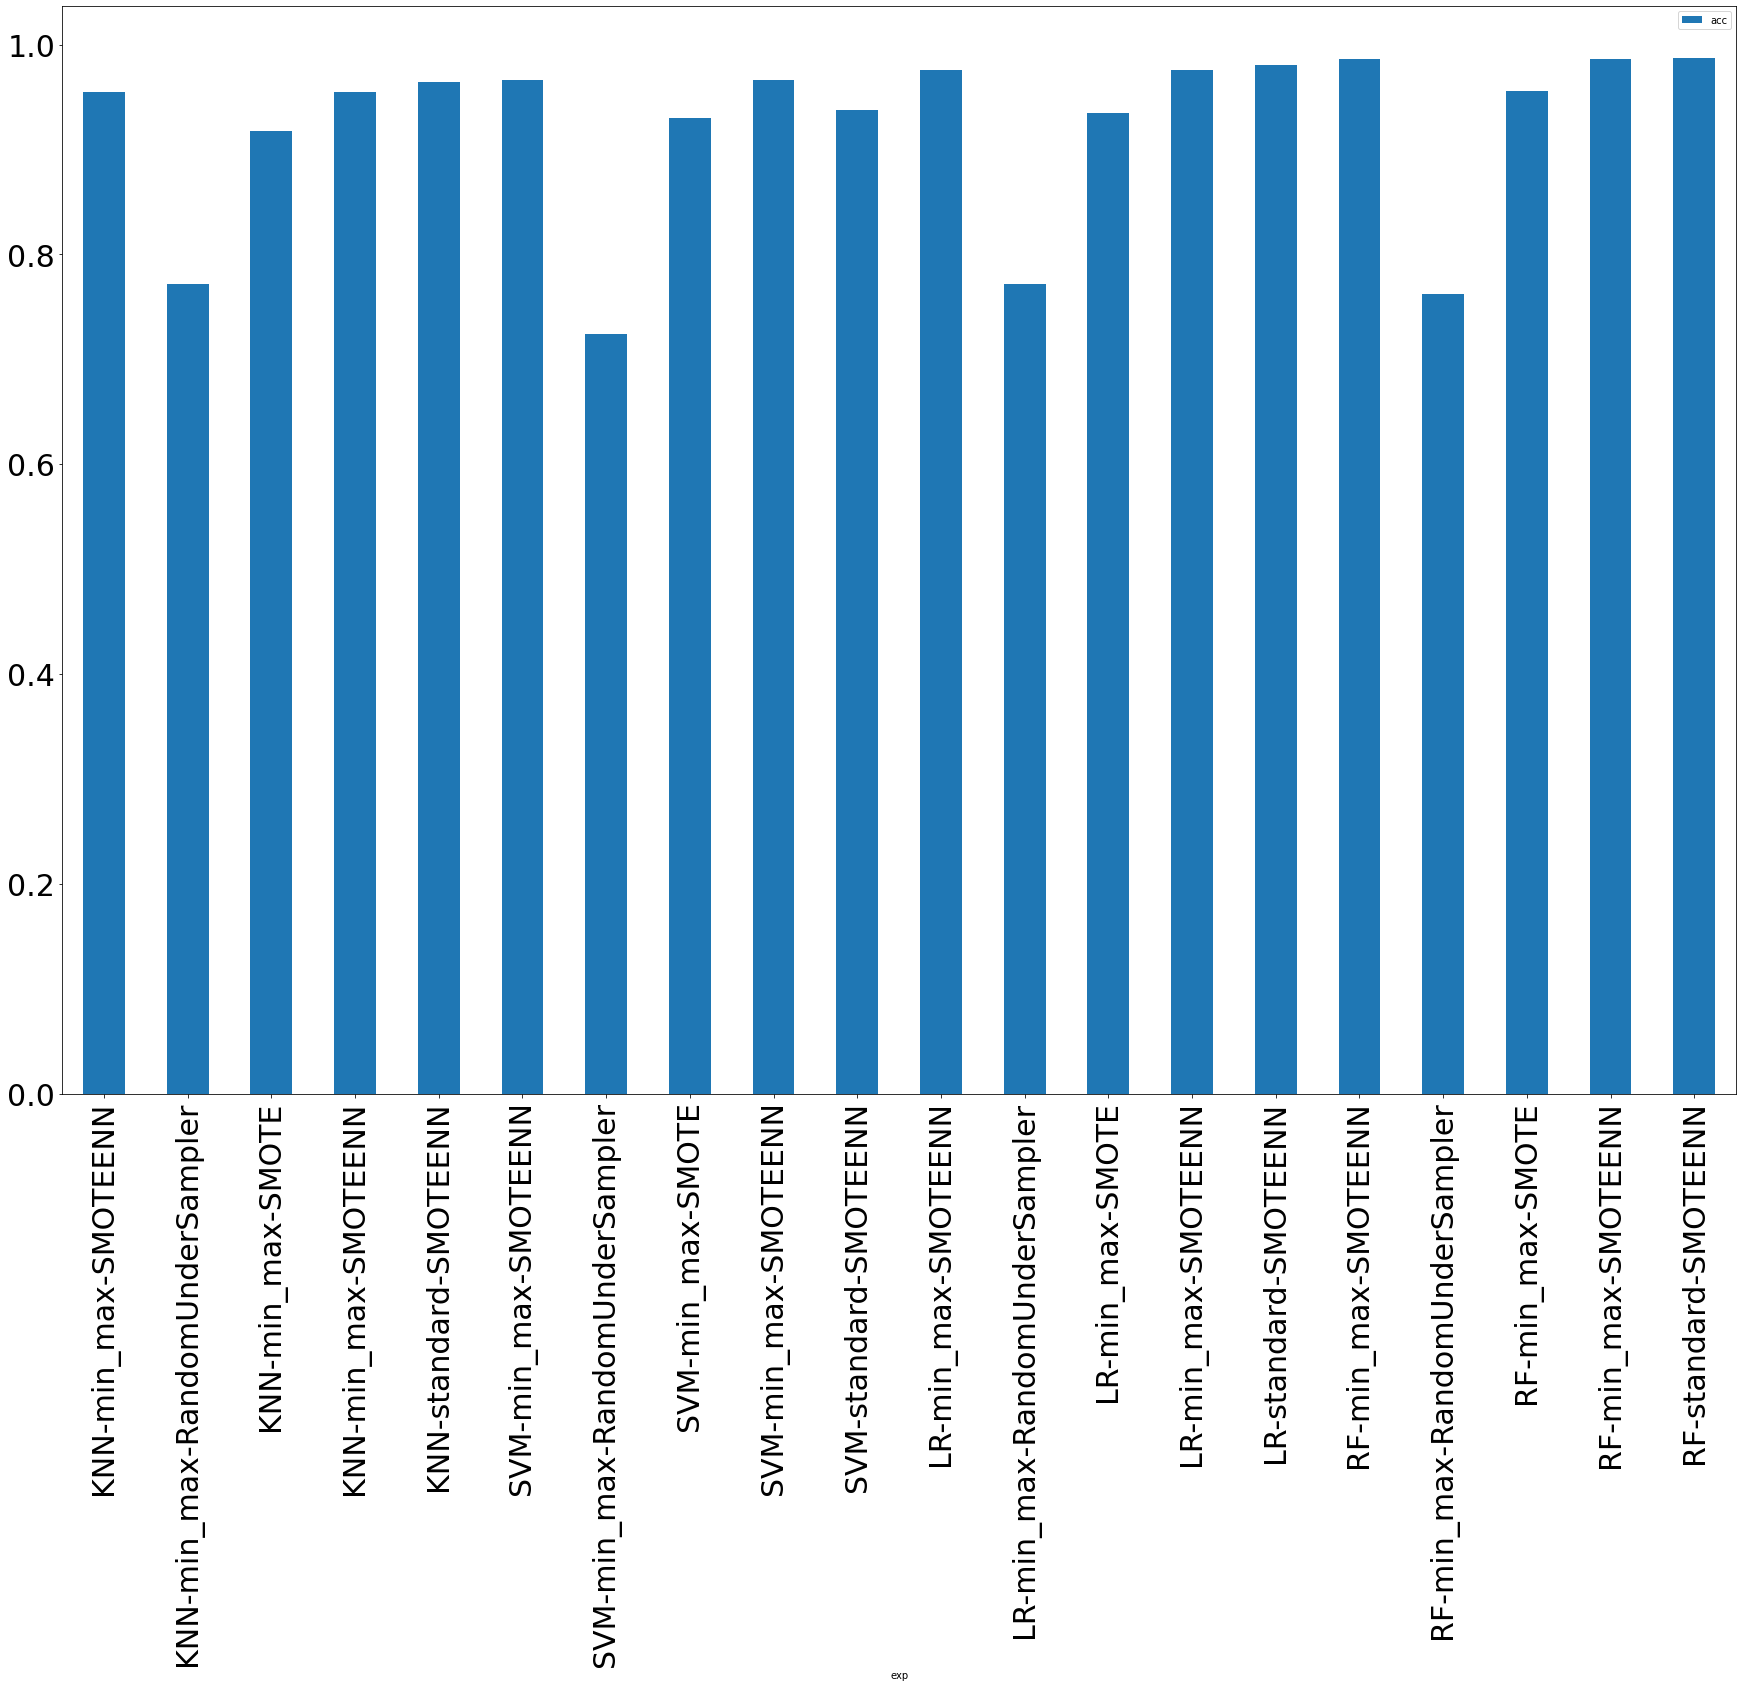

In [29]:
dfReport.plot(x='exp', y='acc', kind='bar', figsize=(30,20), fontsize=30)	

## errors

### lets graph the error rate using diffrent parameters

In [30]:
dfReport['error'] = 1- dfReport['acc']

<AxesSubplot:xlabel='exp'>

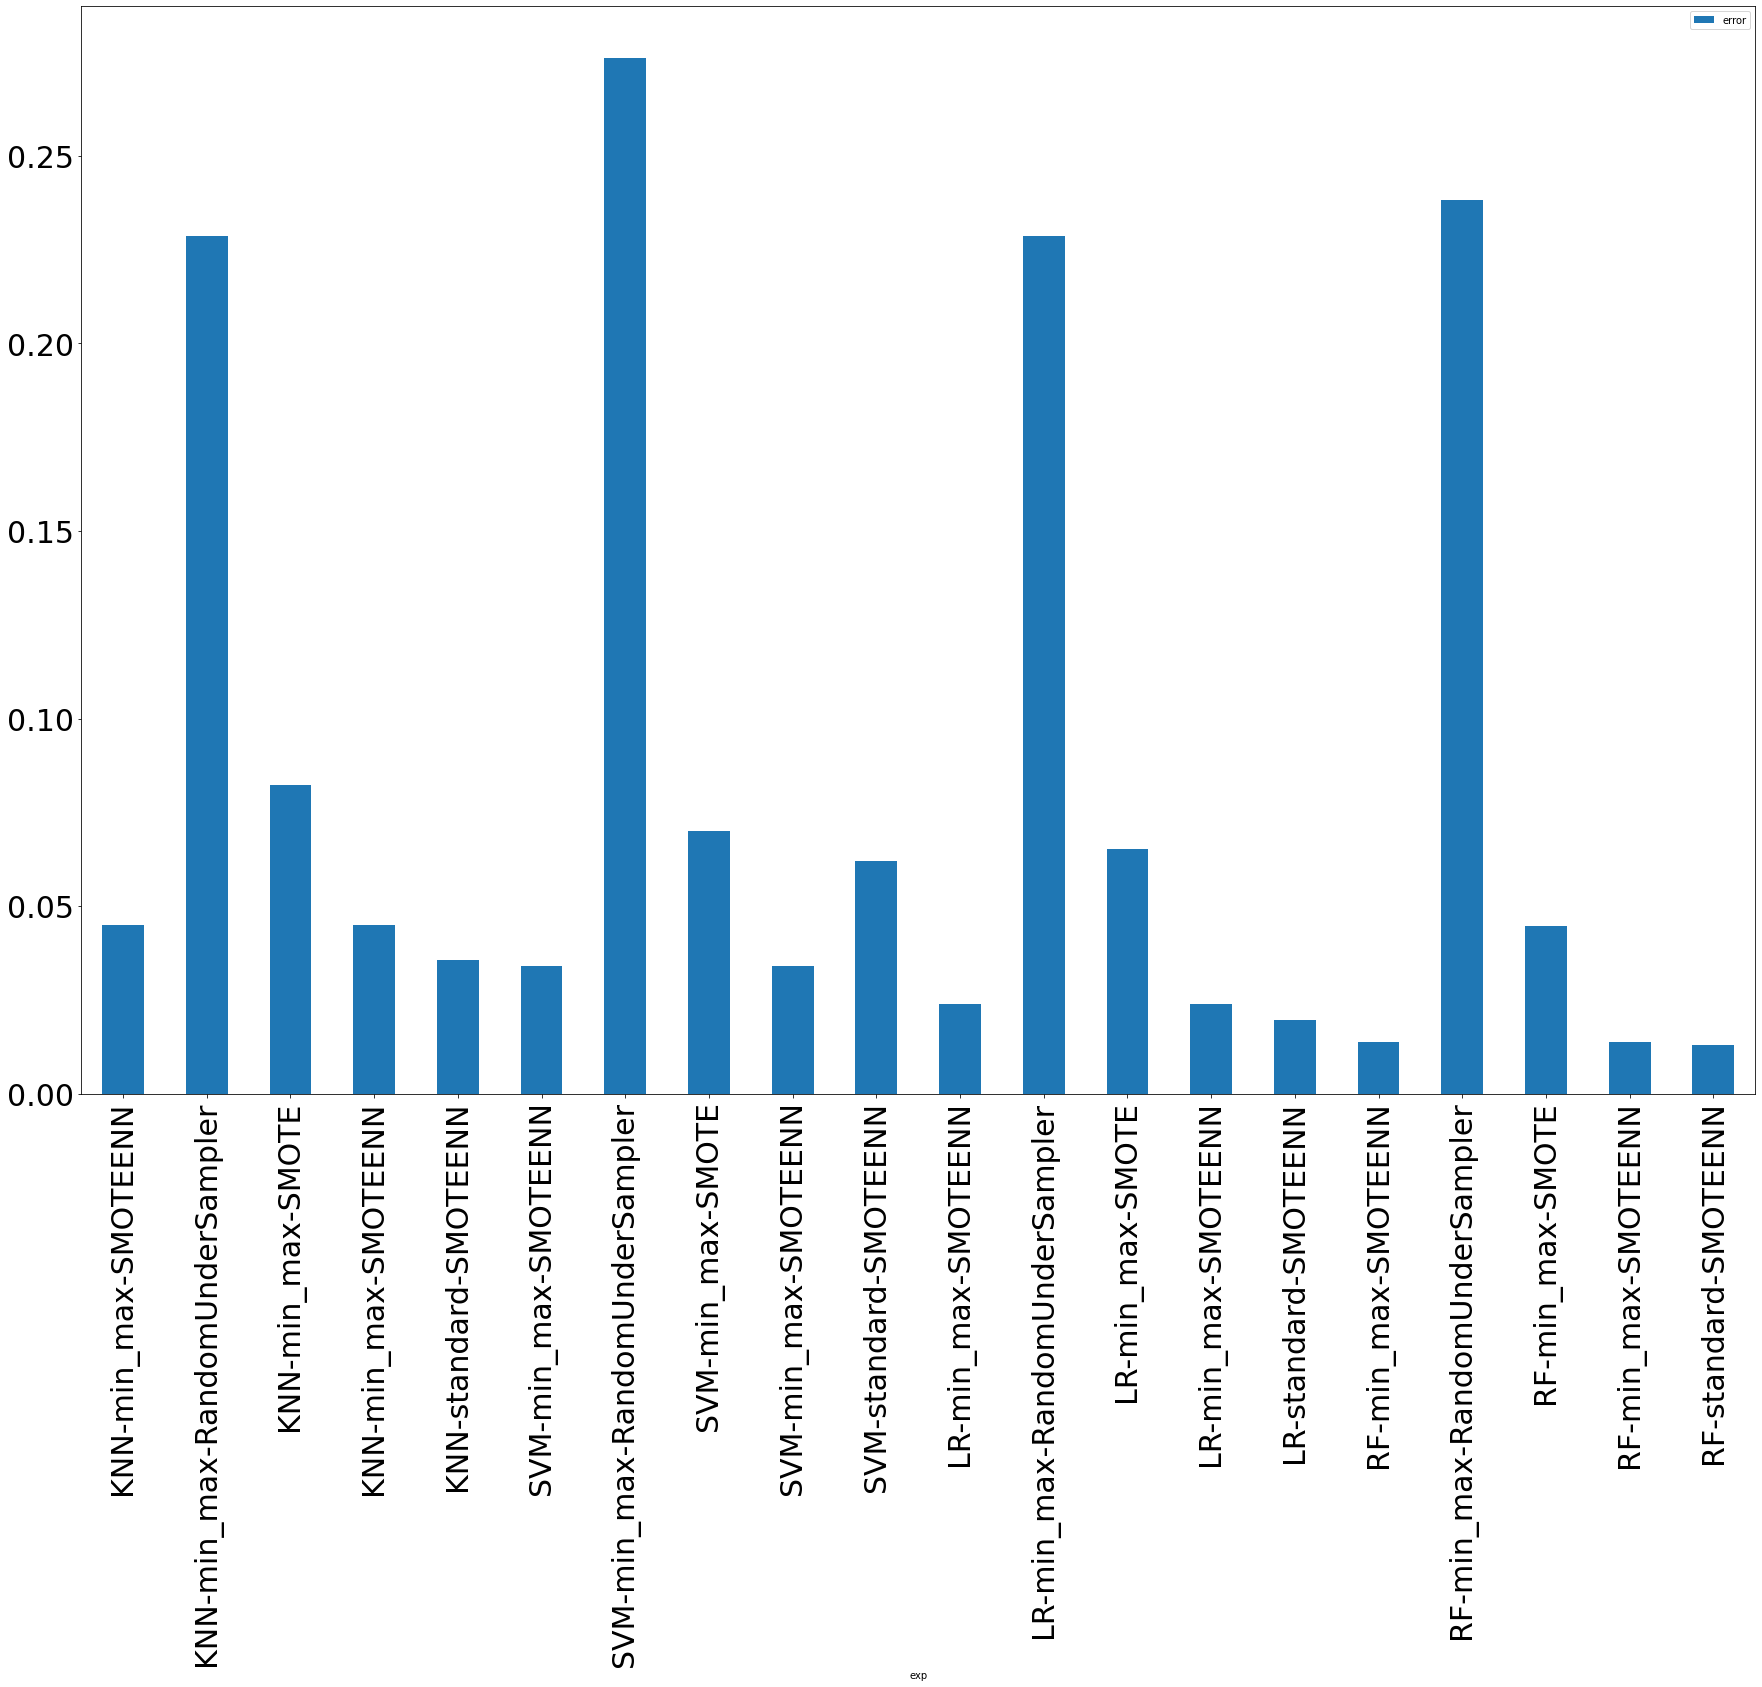

In [31]:
dfReport.plot(x='exp', y='error', kind='bar', figsize=(30,20), fontsize=30)	

### you can drive alot of information about the data and the models used from the graphs but i will leave that to the presentation to not extend this file  